In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [2]:

# Cargar el dataset (descargarlo desde Kaggle si no lo tienes)
url = 'C:/Users/Diego/Desktop/ML/data/train/titanic.csv'

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Configuración para mostrar todo el contenido de las columnas
pd.set_option('display.max_colwidth', None)

# Configuración para mostrar todas las filas (si es necesario)
pd.set_option('display.max_rows', None)

df = pd.read_csv(url)

In [3]:
# Eliminar columnas irrelevantes que no aportan valor al modelo
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}) 

In [4]:
# Rellenar valores nulos (puedes elegir la estrategia que prefieras)
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Rellenar Age con la media
df['Fare'].fillna(df['Fare'].median(), inplace=True)  # Rellenar Fare con la mediana
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Rellenar Embarked con la moda

In [5]:
# Definir el número de clusters (puedes ajustar este valor según creas necesario)
n_clusters = 2
X = df.drop('Survived', axis=1)

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)  # X es tu dataset sin la columna Survived

# Agregar los clusters al dataframe
df['Cluster'] = clusters

# Mostrar cómo se distribuyen los clusters y la supervivencia
print(df.groupby(['Cluster', 'Survived']).size())

Cluster  Survived
0        0            10
         1            27
1        0           501
         1           293
dtype: int64


interpretacion cluster 0 es probablemente sobreviviente mientras que en cluster 1 sea no superviviente

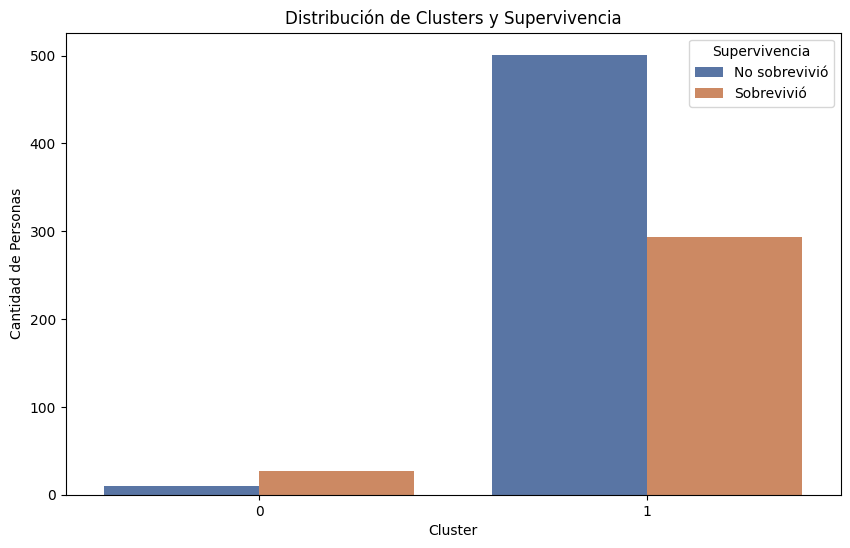

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Survived', palette='deep')
plt.title('Distribución de Clusters y Supervivencia')
plt.xlabel('Cluster')
plt.ylabel('Cantidad de Personas')
plt.legend(title='Supervivencia', loc='upper right', labels=['No sobrevivió', 'Sobrevivió'])
plt.show()


In [10]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

# Supongamos que tienes el dataframe df con la columna 'Survived' y 'Cluster'
# Realizamos la matriz de confusión
y_true = df['Survived']  # Valores reales
y_pred = df['Cluster']    # Valores predichos (clusters)

# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred)
print("Matriz de Confusión:")
print(cm)


Matriz de Confusión:
[[ 10 501]
 [ 27 293]]


In [11]:
# Calcular la precisión
accuracy = accuracy_score(y_true, y_pred)
print(f"Tasa de Bien Predichos (Precisión): {accuracy:.2f}")


Tasa de Bien Predichos (Precisión): 0.36
